In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
#imports
from pathlib import Path
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
#define path
base_path = Path('../input/fashionmnist')

#read data
train_df = pd.read_csv(base_path/'fashion-mnist_train.csv', sep=",")
test_df = pd.read_csv(base_path/'fashion-mnist_test.csv', sep=",")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [14]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)

In [15]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [16]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

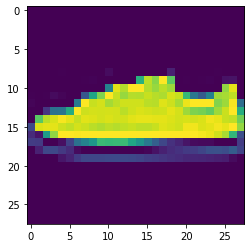

In [17]:
# show image example

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [18]:
#reshape data for models
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [19]:
# our 3 models 
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

2023-01-23 20:45:32.035670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 20:45:32.036677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 20:45:32.168633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 20:45:32.169498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 20:45:32.170208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [58]:
# the model summaries

for model in cnn_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_____________________________________________________

In [21]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=25, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

2023-01-23 20:45:36.002704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-01-23 20:45:37.692016: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


94/94 [==============================] - 10s 12ms/step - loss: 0.8062 - accuracy: 0.7338 - val_loss: 0.4921 - val_accuracy: 0.8217
Epoch 2/25
94/94 [==============================] - 1s 8ms/step - loss: 0.4450 - accuracy: 0.8428 - val_loss: 0.4140 - val_accuracy: 0.8522
Epoch 3/25
94/94 [==============================] - 1s 8ms/step - loss: 0.3937 - accuracy: 0.8621 - val_loss: 0.3675 - val_accuracy: 0.8727
Epoch 4/25
94/94 [==============================] - 1s 9ms/step - loss: 0.3624 - accuracy: 0.8729 - val_loss: 0.3461 - val_accuracy: 0.8797
Epoch 5/25
94/94 [==============================] - 1s 8ms/step - loss: 0.3383 - accuracy: 0.8811 - val_loss: 0.3303 - val_accuracy: 0.8842
Epoch 6/25
94/94 [==============================] - 1s 9ms/step - loss: 0.3230 - accuracy: 0.8847 - val_loss: 0.3359 - val_accuracy: 0.8790
Epoch 7/25
94/94 [==============================] - 1s 8ms/step - loss: 0.3092 - accuracy: 0.8908 - val_loss: 0.3048 - val_accuracy: 0.8933
Epoch 8/25
94/94 [===========

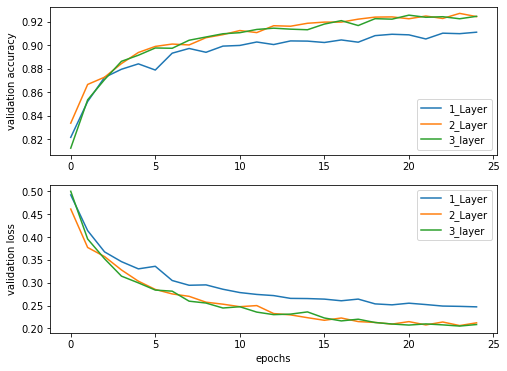

In [22]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_accuracy']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

Confusion matrix, without normalization
[[899   1  16   9   2   0  61   0  12   0]
 [  3 983   1  10   1   0   1   0   1   0]
 [ 21   0 835  12  63   0  65   0   4   0]
 [ 20   5   3 926  21   0  21   0   4   0]
 [  1   1  31  24 887   0  54   0   2   0]
 [  0   2   0   0   0 957   0  25   2  14]
 [150   0  47  24  41   0 728   0  10   0]
 [  0   0   0   0   0   2   0 959   0  39]
 [  2   2   3   1   2   2   3   2 983   0]
 [  0   0   0   0   0   1   0  22   1 976]]


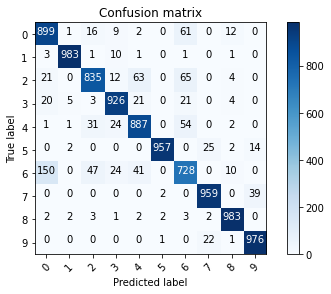

Confusion matrix, without normalization
[[828   1  13  21   2   0 128   0   6   1]
 [  1 986   1   9   0   0   2   0   1   0]
 [ 14   1 835  14  72   0  64   0   0   0]
 [  4   2   2 961  17   0  14   0   0   0]
 [  0   2  16  26 902   0  54   0   0   0]
 [  0   0   0   0   0 977   0  13   2   8]
 [ 62   1  34  28  39   0 833   0   3   0]
 [  0   0   0   0   0   9   0 971   0  20]
 [  1   1   2   1   3   3   4   1 982   2]
 [  0   0   0   0   0   0   0  30   0 970]]


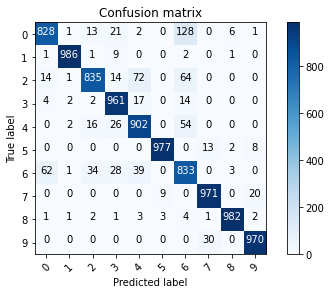

Confusion matrix, without normalization
[[899   0  19  13   2   1  63   0   3   0]
 [  0 988   1   8   1   1   1   0   0   0]
 [ 17   0 852  11  65   1  53   0   1   0]
 [  6   4   4 952  18   0  15   0   0   1]
 [  0   1  17  22 921   1  38   0   0   0]
 [  0   0   0   0   0 971   0  20   2   7]
 [106   1  40  28  72   0 750   0   3   0]
 [  0   0   0   0   0   4   0 968   0  28]
 [  3   0   3   2   1   0   4   1 986   0]
 [  0   0   0   0   0   2   0  24   0 974]]


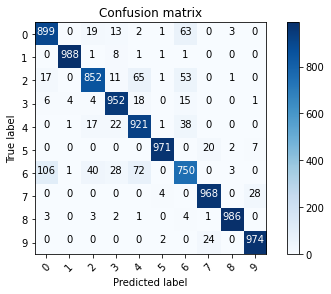

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


for model in cnn_models:
    p_test = model.predict(x_test).argmax(axis=1)
    cm = confusion_matrix(y_test, p_test)
    plot_confusion_matrix(cm, list(range(10)))

In [59]:
# save the models for our application
cnn_model_3.save("cnn_model_3.h5")

In [24]:
from sklearn.metrics import accuracy_score
for model in cnn_models:
#     p_test = model.predict(x_test).argmax(axis=1)
#     cm = confusion_matrix(y_test, p_test)
#     plot_confusion_matrix(cm, list(range(10)))
    accuracy_score(y_test, p_test)
    print(accuracy_score)

<function accuracy_score at 0x7fa8233cc950>
<function accuracy_score at 0x7fa8233cc950>
<function accuracy_score at 0x7fa8233cc950>


In [26]:
def acc(y_true, y_pred):
    return np.equal(np.argmax(y_true, axis=-1), np.argmax(y_pred, axis=-1)).mean()

for model in cnn_models:
    print("accuracy: " + str(acc(y_test, p_test)))

accuracy: 1.0
accuracy: 1.0
accuracy: 1.0


In [28]:
labels_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
img_width  = 28
img_height = 28
channels   = 1
img_reshape = image.reshape([1,img_height,img_width,channels])

In [31]:
img_reshape.shape

(1, 28, 28, 1)

In [32]:
# predict lavel for an example
for models in cnn_models:
    predictions = model.predict(img_reshape)
labels_names[np.argmax(predictions)]

'Sneaker'